In [36]:
# Step 0: Import Libreries
import pandas as pd
import numpy as np

# Graphics
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris # Data Set examples
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [9]:
# Step 1: Get Data Set
X, y = load_iris(return_X_y= True, as_frame= True)
df_row = X
df_row['target'] = y
df_row.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


This data set have 4 variables and 1 prediction
- The name of columns have a space
- The 
- Target is the last row

In [26]:
# Step 2: Preprosecing
df_interim = df_row.copy()
df_interim.columns = ['sepal_lenght_cm', 'sepal_width_cm', 'petal_lenght_cm', 'petal_widht_cm', 'target']
df = df_interim['target'].copy()
df = pd.concat([df, df_interim.drop(['target'], axis= 1)], axis= 1)
df['target'] = df['target'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   target           150 non-null    category
 1   sepal_lenght_cm  150 non-null    float64 
 2   sepal_width_cm   150 non-null    float64 
 3   petal_lenght_cm  150 non-null    float64 
 4   petal_widht_cm   150 non-null    float64 
dtypes: category(1), float64(4)
memory usage: 5.1 KB


In [27]:
# Step 3: EDA

# Split Data Set
df_train, df_test = train_test_split(df, test_size=0.2, stratify= df['target'], random_state= 2024)

In [28]:
display(df_train.describe(include= 'number').T)
display(df_train.describe(include= 'category').T)

,count,mean,std,min,25%,50%,75%,max
sepal_lenght_cm,120.0,5.852500,0.807420,4.3,5.1,5.80,6.4,7.7
sepal_width_cm,120.0,3.084167,0.428206,2.0,2.8,3.00,3.4,4.4
petal_lenght_cm,120.0,3.775000,1.750642,1.0,1.6,4.35,5.1,6.9
petal_widht_cm,120.0,1.214167,0.766888,0.1,0.3,1.30,1.8,2.5


,count,unique,top,freq
target,120,3,0,40


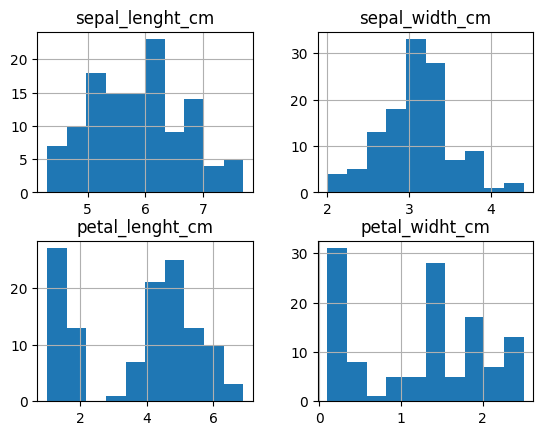

In [29]:
# Step 3.1: Univariate 
df_train.hist()
plt.show()

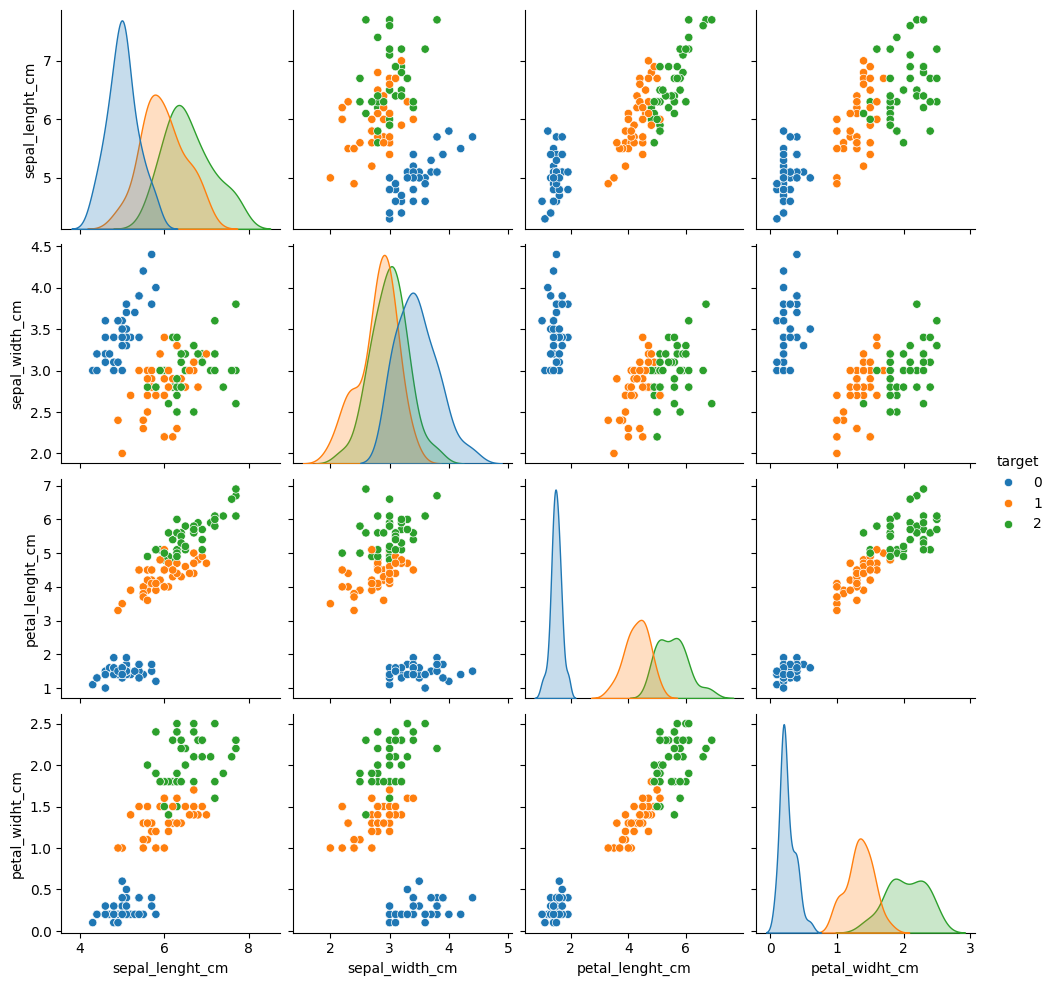

In [30]:
# Step 3.2: Bi variate analysis
sns.pairplot(data= df_train, hue= 'target')
plt.show()

Observamos que 1,3: Azul esta separado de naranja y verde
Observamos en 4,3: Que Azul si esta bien separada de las otras dos clases
Conclusión: Esta es una buena variable para separar = **sepal_lenght**

Comportamiento similar con **petal_widht**

In [31]:
df_train.select_dtypes('number').corr()

,sepal_lenght_cm,sepal_width_cm,petal_lenght_cm,petal_widht_cm
sepal_lenght_cm,1.000000,-0.188129,0.875812,0.831525
sepal_width_cm,-0.188129,1.000000,-0.468771,-0.375482
petal_lenght_cm,0.875812,-0.468771,1.000000,0.963192
petal_widht_cm,0.831525,-0.375482,0.963192,1.000000


Corroboramos que existe correlación entre las variables:
- sepal_lenght_cm con petal_lenght_cm = 0.875812
- sepal_lenght_cm con petal_widht_cm = 0.831525
- petal_lenght_cm con petal_widht_cm = 0.963192

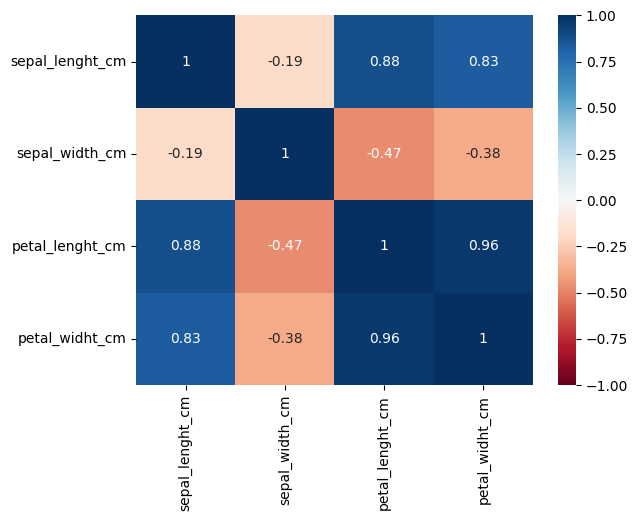

In [32]:
sns.heatmap(df_train.select_dtypes('number').corr(), vmin= -1, vmax= 1, annot= True, cmap="RdBu")
plt.show()

In [33]:
# Step 4: Model ML
X_train = df_train.drop('target', axis= 1).reset_index(drop= True) # Separate independent values ​​from dependent variables for TRAIN
y_train = df_train['target'].reset_index(drop= True) # Select independent values for TRAIN
X_test = df_test.drop('target', axis= 1).reset_index(drop= True) # Separate independent values ​​from dependent variables for TEST
y_test = df_test['target'].reset_index(drop= True) # Select independent values for TEST

In [34]:
# Model
clf_nb = GaussianNB()
clf_nb.fit(X_train, y_train)

GaussianNB()

In [35]:
y_pred = clf_nb.predict(X_test)

In [39]:
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

Accuracy: 0.9666666666666667


In [40]:
from sklearn.datasets import load_wine

In [41]:
X, y = load_wine(return_X_y= True, as_frame= True)

In [43]:
X

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [44]:
y

0      0
1      0
2      0
3      0
4      0
      ..
173    2
174    2
175    2
176    2
177    2
Name: target, Length: 178, dtype: int64

In [45]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl